# Unsupervised Learning: K-means clustering

Visualization and application of K-means algorithm.

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib notebook

In [2]:
mat = scipy.io.loadmat('ex7data2.mat')

In [3]:
X = mat['X']
np.random.seed(1)

In [4]:
def find_closest_centroids(X, centroids):
    
    # Computes the euclidan distance for each datapoint, centroid pair and returns  
    # the centroid index with the shortest distance.
    
    idx = []
    
    for i in range(len(X)):
        dist_list = np.sum((centroids - X[i])**2, axis = 1)
        idx.append(np.argmin(dist_list))

    return np.array(idx)

In [5]:
def compute_centroids(X, idx, K):
    
    # Calculates the new centroid position using the averages of all the datapoints  
    # currently assigned to a given centroid.
    
    centroids = []
    
    for i in range(K):
        centroids.append(np.mean(X[idx == i], axis = 0))
        
    return np.array(centroids)

In [6]:
def initialize_centroids(X, K):
    
    # Chooses K random examples from dataset X to use as initial centroids.
    
    index = np.random.randint(0, 300, K)
    
    return X[index]
    

In [7]:
def run_k_means(X, initial_centroids, max_iter, display=False):

    '''
    Runs the interative process of assigning each datapoint to it's closest centroid
    and then using those datapoints to compute the new position of the centroids.
       
    Setting display to True will plot the process of cluster assignment and computation. 
    Only set to true if data is 2 dimensional.
    '''
    
    import time
    
    m, n = np.shape(X);
    K = len(initial_centroids)
    
    cen = initial_centroids;
    old_cen = cen
    
    initial_index = find_closest_centroids(X, cen)
    initial_index_colors = ['r' if i == 0 else 'g' if i ==1  else 'c' for i in initial_index]
    
    if display:
        fig, ax = plt.subplots(1,1)
        plt.scatter(X[:,0], X[:,1], alpha=0.5)
        fig.canvas.draw()
        time.sleep(1)
        
        plt.scatter(cen[:,0], cen[:,1], 
                    c=['r', 'g', 'c'], 
                    marker='o', s=100, 
                    linewidths=1, 
                    edgecolors='k')
        plt.scatter(X[:,0], X[:,1], c=initial_index_colors, alpha=0.5)
        fig.canvas.draw()
        time.sleep(1)
    
    for i in range(max_iter):

        old_cen = cen
        index = find_closest_centroids(X, cen)
        cen = compute_centroids(X, index, K)
        color_index = ['r' if i == 0 else 'g' if i ==1  else 'c' for i in index]
        
        if display:
            plt.scatter(X[:,0], X[:,1], c=color_index, alpha=0.5)
            plt.scatter(cen[:,0], cen[:,1], 
                        c=['r', 'g', 'c'], 
                        marker='o', s=100, 
                        linewidths = 1, 
                        edgecolors = 'k')
            plt.plot([old_cen[:,0], cen[:,0]], [old_cen[:,1], cen[:,1]], c='k')
            fig.canvas.draw()
            time.sleep(1)
        
    return index, cen

In [8]:
K = 3

In [9]:
initial_centroids = initialize_centroids(X, K)

<IPython.core.display.Javascript object>


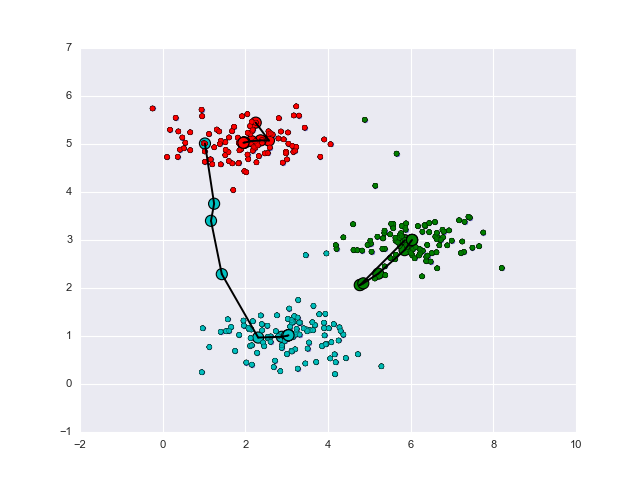

In [10]:
index, cent = run_k_means(X, initial_centroids, 10, display = True)

# Image compression with K-means

The image's data is a 128 x 128 x 3 matrix, with each value in the third dimension representing the red, green, and blue values at a given pixel. Running K-means on this dataset effectively finds the K most essential colors represented in the image and then reassigns each pixel's value to it's closest centroid (color).

In [11]:
import matplotlib.image as mpimg

In [12]:
# Load image data of shape 128 * 128 * 3.

A = mpimg.imread('bird_small.png')
height = np.shape(A)[0]
width = np.shape(A)[1]

# Divide by max value so data has a range of 0-1.

A = A/255

# Reshape data to two dimensions.

X = A.reshape(height * width,3)

In [13]:
# Setting K chooses the number of colors used to compress image.

K = 16
max_iters = 10

In [14]:
initial_centroids = initialize_centroids(X, K)

In [15]:
index, centroids = run_k_means(X, initial_centroids, max_iters)

In [16]:
# Each point in X_recovered is now the value of its closest centroid (color).

X_recovered = centroids[index,:]

In [17]:
# Reshape X data so it can be read as an image.

X_recovered = X_recovered.reshape(height, width, 3)

<IPython.core.display.Javascript object>


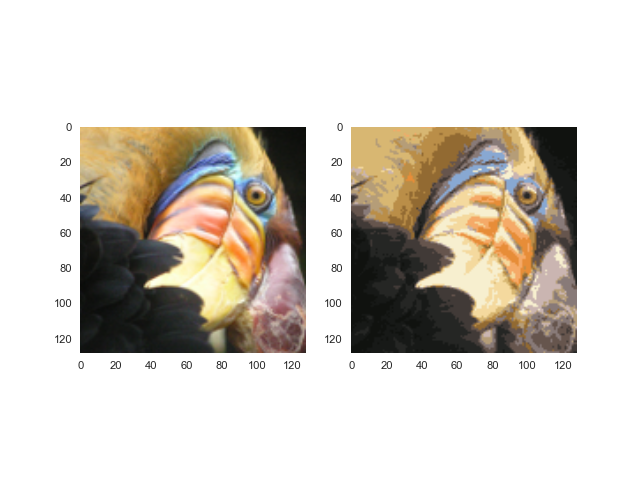

In [18]:
# Plot image using original range of colors, as well as reconstructed image using 16 colors.

fig, ax = plt.subplots(1,2)

ax[0].imshow(A * 255)
ax[0].grid(False)

ax[1].imshow(X_recovered*255)
ax[1].grid(False)


# Principal Component Analysis
Using PCA to project the original image's data onto 2d space to simplify visualization.

In [19]:
def feature_normalize(X):
    
    # Normalize data to have a mean of 0 and a standard deviation of 1.
    
    mu = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    
    X_norm = (X - mu)/std
    
    return X_norm, mu, std

In [20]:
def pca(X):
    
    # Computes the covariance matrix sigma, and the single value decomposition for that matrix.
    # Returns U, a is a matrix of principal components.
    
    m,n = np.shape(X)
    sigma = X.T.dot(X)/m
    U, S, V = np.linalg.svd(sigma)
    
    return U

In [21]:
def project_data(X, U, K):
    
    # Returns original data projected onto first K principal components.
    
    U_reduce = U[:,:K]
    Z = X.dot(U_reduce)
    
    return Z

In [22]:
# Plot subset of data.

sel = np.random.randint(0,len(X), 1000)

<IPython.core.display.Javascript object>


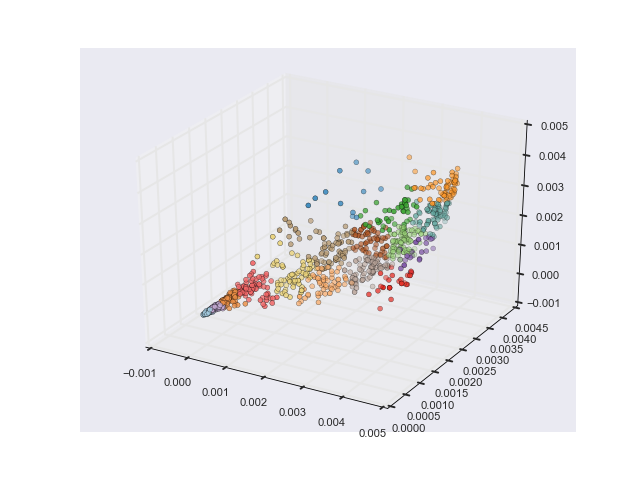

In [23]:
# Plot image data in 3 dimensions. Points are colored 
# according to their closest centroid computed by the k-means algorithm.

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[sel, 0], X[sel, 1], X[sel, 2], c=index[sel], cmap = 'Paired')

In [24]:
X_norm, mu, std = feature_normalize(X)

In [25]:
# Principal components of image data.

U = pca(X_norm)

In [26]:
# Project data onto first two principal components.

Z = project_data(X_norm, U, 2)

<IPython.core.display.Javascript object>


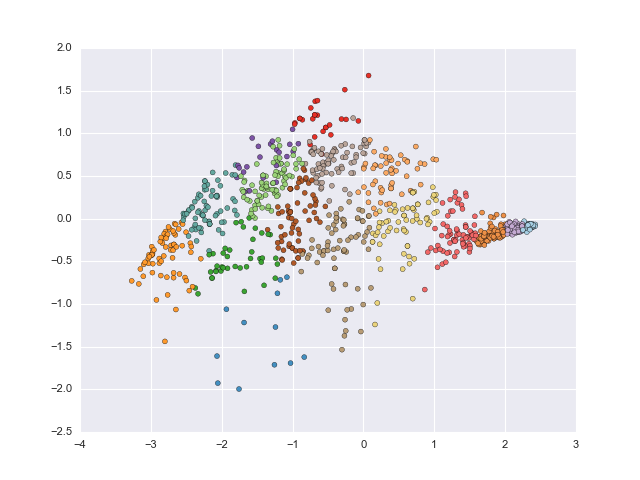

In [27]:
# Plot reduced dimension data.

plt.figure()
plt.scatter(Z[sel,0],Z[sel,1], c = index[sel], cmap='Paired')